In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import os

In [2]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


In [3]:
path = 'caltech-101/101_ObjectCategories'
classes = os.listdir(path)

newlist = []
for item in classes:
    try:
        os.listdir(path+'/'+item)
        newlist.append(item)
    except:
        continue
classes = newlist
classes

['gerenuk',
 'hawksbill',
 'headphone',
 'ant',
 'butterfly',
 'lamp',
 'strawberry',
 'water_lilly',
 'chandelier',
 'dragonfly',
 'crab',
 'pagoda',
 'dollar_bill',
 'emu',
 'inline_skate',
 'platypus',
 'dalmatian',
 'cup',
 'airplanes',
 'joshua_tree',
 'cougar_body',
 'grand_piano',
 'trilobite',
 'brontosaurus',
 'wild_cat',
 'pigeon',
 'dolphin',
 'soccer_ball',
 'wrench',
 'scorpion',
 'flamingo_head',
 'nautilus',
 'accordion',
 'cougar_face',
 'pyramid',
 'camera',
 'barrel',
 'schooner',
 'cellphone',
 'panda',
 'revolver',
 'lobster',
 'menorah',
 'lotus',
 'stapler',
 'crocodile',
 'chair',
 'helicopter',
 'minaret',
 'starfish',
 'ceiling_fan',
 'ketch',
 'mayfly',
 'wheelchair',
 'bass',
 'yin_yang',
 'crocodile_head',
 'saxophone',
 'beaver',
 'mandolin',
 'bonsai',
 'Leopards',
 'car_side',
 'ibis',
 'electric_guitar',
 'kangaroo',
 'stegosaurus',
 'ferry',
 'snoopy',
 'umbrella',
 'rhino',
 'okapi',
 'watch',
 'brain',
 'gramophone',
 'scissors',
 'rooster',
 'cannon'

In [4]:
myclasses = classes
myclasses.remove('BACKGROUND_Google')
myclasses.remove('Faces_easy')
len(myclasses)

100

In [6]:
SIZE = 100
collage = np.zeros([10*SIZE, 10*SIZE, 3],'float32')

for classnum in range(len(myclasses)):
    print(myclasses[classnum],end='\t')
    folder = path + '/' + myclasses[classnum]
    filelist = os.listdir(folder)
    classmean = np.zeros([SIZE, SIZE, 3],'float32')
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[SIZE,SIZE])
        classmean = classmean + image
    classmean = classmean / len(filelist)
    classmean = imNormalize(classmean)
    row = classnum // 10   
    col = classnum % 10
    collage[row*SIZE:(row+1)*SIZE,col*SIZE:(col+1)*SIZE,:] = classmean
       
    

gerenuk	hawksbill	headphone	ant	butterfly	lamp	strawberry	water_lilly	chandelier	dragonfly	crab	pagoda	dollar_bill	emu	inline_skate	platypus	dalmatian	cup	airplanes	joshua_tree	cougar_body	grand_piano	trilobite	brontosaurus	wild_cat	pigeon	dolphin	soccer_ball	wrench	scorpion	flamingo_head	nautilus	accordion	cougar_face	pyramid	camera	barrel	schooner	cellphone	panda	revolver	lobster	menorah	lotus	stapler	crocodile	chair	helicopter	minaret	starfish	ceiling_fan	ketch	mayfly	wheelchair	bass	yin_yang	crocodile_head	saxophone	beaver	mandolin	bonsai	Leopards	car_side	ibis	electric_guitar	kangaroo	stegosaurus	ferry	snoopy	umbrella	rhino	okapi	watch	brain	gramophone	scissors	rooster	cannon	binocular	anchor	octopus	buddha	laptop	windsor_chair	hedgehog	pizza	euphonium	stop_sign	Motorbikes	sea_horse	flamingo	ewer	garfield	crayfish	Faces	sunflower	llama	elephant	tick	metronome	

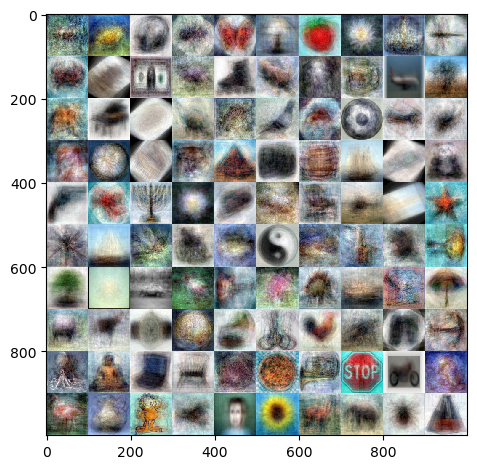

In [8]:
collage = imNormalize(collage)
io.imshow(collage)